In [21]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_confusion_matrix(cm, title = "Confusion Marix"):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No diabetes', 'Diabetes'])
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()


In [23]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('Outcome', axis=1), data['Outcome'], random_state=0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(3, 15),
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 2160 candidates, totalling 21600 fits
{'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 20}
0.6546095235429128


F1 score:  0.6386554621848739
Precision:  0.6666666666666666
Recall:  0.6129032258064516
Classification report: 
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       130
           1       0.67      0.61      0.64        62

    accuracy                           0.78       192
   macro avg       0.74      0.73      0.74       192
weighted avg       0.77      0.78      0.77       192



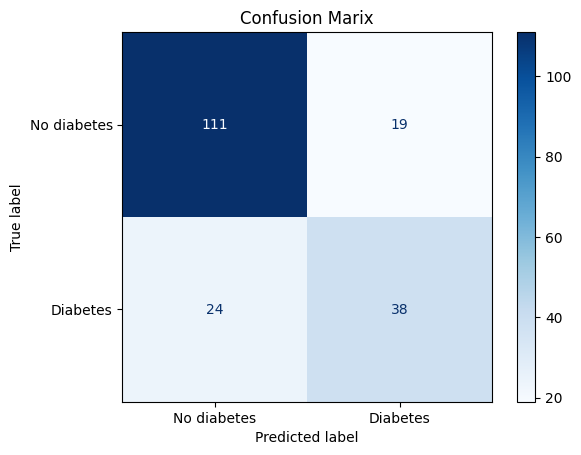

In [26]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix

forest = RandomForestClassifier(**grid_search.best_params_, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

print('F1 score: ', f1_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('Classification report: \n', classification_report(y_test, y_pred))
plot_confusion_matrix(confusion_matrix(y_test, y_pred))

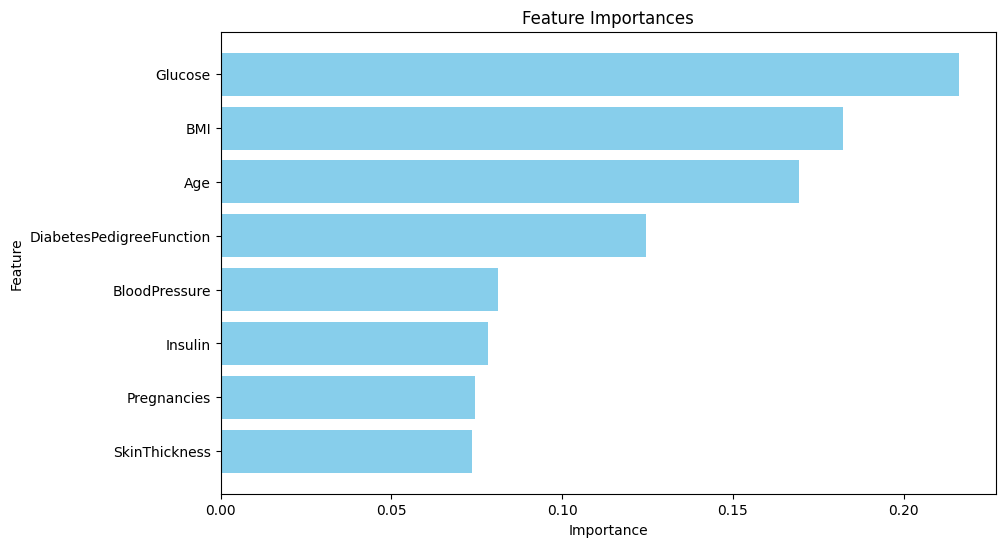

In [27]:
feature_importances = (forest.feature_importances_)
feature_names = X_train.columns

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

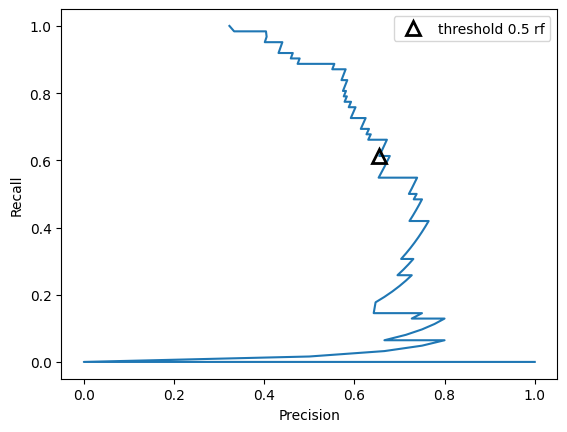

In [28]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, forest.predict_proba(X_test)[:, 1])

plt.plot(precision, recall)

close_default = np.argmin(np.abs(thresholds - 0.5))
plt.plot(precision[close_default], recall[close_default], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)

plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

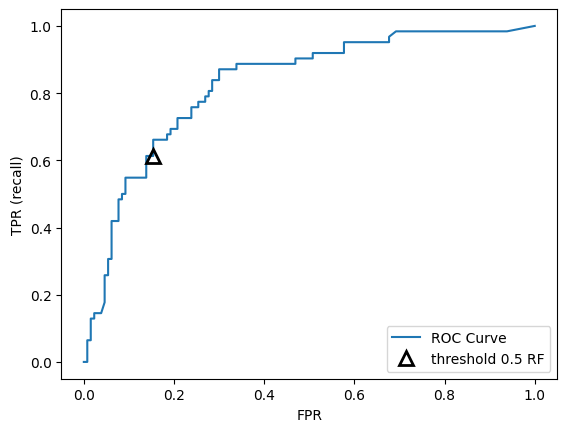

In [29]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, forest.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
close_default = np.argmin(np.abs(thresholds - 0.5))
plt.plot(fpr[close_default], tpr[close_default], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [30]:
print(importance_df.iloc[4:]['Feature'])

2    BloodPressure
4          Insulin
0      Pregnancies
3    SkinThickness
Name: Feature, dtype: object


In [31]:
X_test_less = X_test.drop(importance_df['Feature'].iloc[4:], axis=1)
X_train_less = X_train.drop(importance_df['Feature'].iloc[4:], axis=1)
X_train_less.head()

,Glucose,BMI,DiabetesPedigreeFunction,Age
762,89,22.5,0.142,33
127,118,33.3,0.261,23
564,91,32.4,0.601,27
375,140,39.2,0.528,58
663,145,37.9,0.637,40


In [32]:
param_grid = {
    'n_estimators': range(5,10),
    'max_depth': range(3, 15),
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

grid_search_less = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=10, n_jobs=-1, verbose=1, scoring='f1')
grid_search_less.fit(X_train_less, y_train)

print(grid_search_less.best_params_)
print(grid_search_less.best_score_)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits
{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 9}
0.6537494897747911


F1 score:  0.6071428571428571
Precision:  0.68
Recall:  0.5483870967741935
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.68      0.55      0.61        62

    accuracy                           0.77       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192



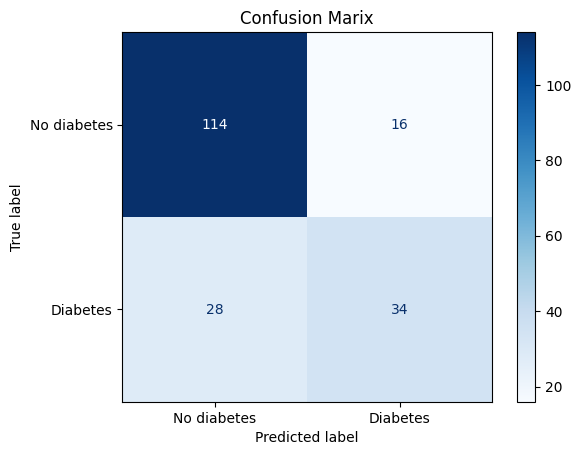

In [33]:
forest_less = RandomForestClassifier(**grid_search_less.best_params_, random_state=0)
forest_less.fit(X_train_less, y_train)
y_pred_less = forest_less.predict(X_test_less)

print('F1 score: ', f1_score(y_test, y_pred_less))
print('Precision: ', precision_score(y_test, y_pred_less))
print('Recall: ', recall_score(y_test, y_pred_less))
print('Classification report: \n', classification_report(y_test, y_pred_less))
plot_confusion_matrix(confusion_matrix(y_test, y_pred_less))

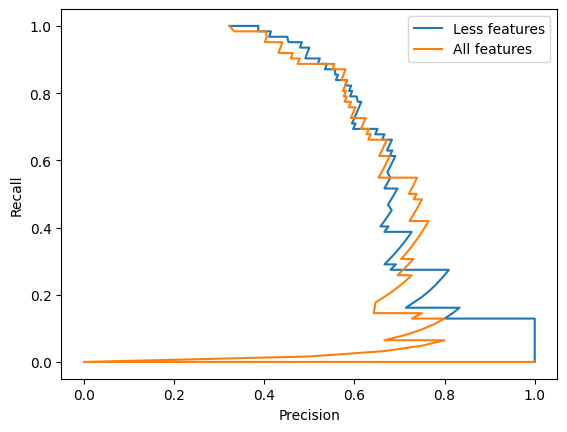

In [34]:
precision_less, recall_less, thresholds_less = precision_recall_curve(y_test, forest_less.predict_proba(X_test_less)[:, 1])

plt.plot(precision_less, recall_less, label='Less features')

plt.plot(precision, recall, label='All features')


plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

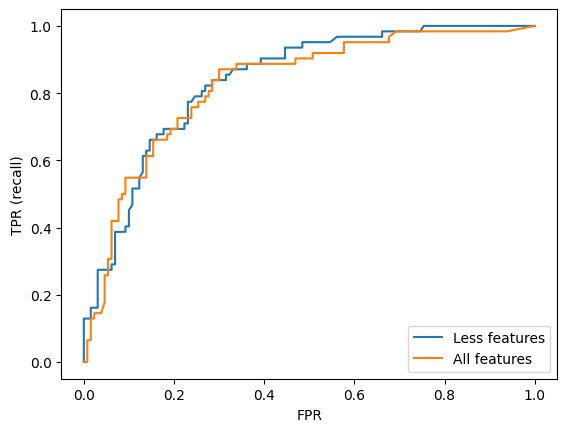

In [35]:
fpr_less, tpr_less, thresholds_less = roc_curve(y_test, forest_less.predict_proba(X_test_less)[:, 1])

plt.plot(fpr_less, tpr_less, label='Less features')

plt.plot(fpr, tpr, label='All features')


plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4)


# Conclusion
The model with less features has a slightly lower F1 score, but the difference is not significant. The model with less features is simpler and easier to interpret, so it is a better choice.

In [36]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

model_tree = RandomForestClassifier(random_state=0)
rfe = RFE(estimator=model_tree)

pipeline = Pipeline(steps=[('s',rfe), ('m',model_tree)])

param_grid = {
    's__n_features_to_select': range(2, 8),
    'm__n_estimators': range(5, 10),
    'm__max_depth': range(3, 8),
    'm__min_samples_split': [2, 3, 4, 5],
    'm__min_samples_leaf': [1, 2, 4, 5]
}

grid_search_rfe = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=10, n_jobs=-1, verbose=1, scoring='f1')
grid_search_rfe.fit(X_train, y_train)

print('Best parameters: ', grid_search_rfe.best_params_)
print('Best score: ', grid_search_rfe.best_score_)
best_pipeline = grid_search_rfe.best_estimator_
y_pred_pipeline = best_pipeline.predict(X_test)

print('F1 score: ', f1_score(y_test, y_pred_pipeline))
print('Precision: ', precision_score(y_test, y_pred_pipeline))
print('Recall: ', recall_score(y_test, y_pred_pipeline))
print('Classification report: \n', classification_report(y_test, y_pred_pipeline))
print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_pipeline))

Fitting 10 folds for each of 2400 candidates, totalling 24000 fits
Best parameters:  {'m__max_depth': 7, 'm__min_samples_leaf': 1, 'm__min_samples_split': 2, 'm__n_estimators': 7, 's__n_features_to_select': 7}
Best score:  0.6709891727610524
F1 score:  0.6306306306306306
Precision:  0.7142857142857143
Recall:  0.5645161290322581
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       130
           1       0.71      0.56      0.63        62

    accuracy                           0.79       192
   macro avg       0.76      0.73      0.74       192
weighted avg       0.78      0.79      0.78       192

Confusion matrix: 
 [[116  14]
 [ 27  35]]


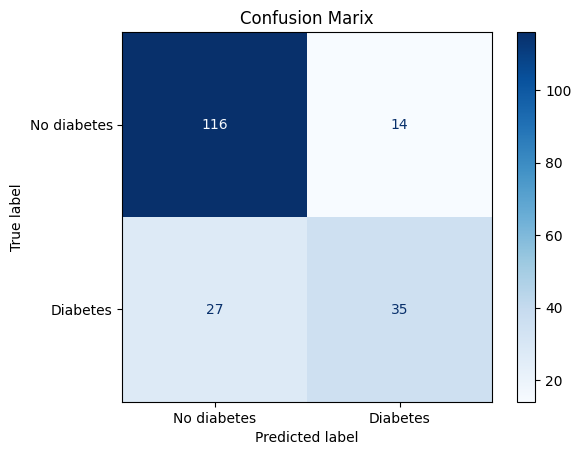

In [37]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_pipeline))